In [1]:
import csv
import tensorflow as tf
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ipd = pd.read_csv("iris.data")
ipd.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


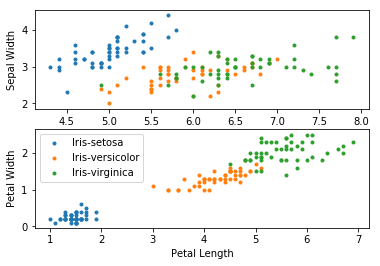

In [3]:
plt.subplot(2,1,1)
for key,val in ipd.groupby('Species'):
    plt.scatter(val['Sepal Length'], val['Sepal Width'], label=key, marker='.')   
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2,1,2)
for key,val in ipd.groupby('Species'):
    plt.scatter(val['Petal Length'], val['Petal Width'], label=key, marker='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')   
plt.legend(loc='best')
plt.show()

In [4]:
species = list(ipd['Species'].unique())
ipd['One-hot'] = ipd['Species'].map(lambda x: np.eye(len(species))[species.index(x)] )
ipd.sample(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,One-hot
3,4.6,3.1,1.5,0.2,Iris-setosa,"[1.0, 0.0, 0.0]"
55,5.7,2.8,4.5,1.3,Iris-versicolor,"[0.0, 1.0, 0.0]"
70,5.9,3.2,4.8,1.8,Iris-versicolor,"[0.0, 1.0, 0.0]"
56,6.3,3.3,4.7,1.6,Iris-versicolor,"[0.0, 1.0, 0.0]"
120,6.9,3.2,5.7,2.3,Iris-virginica,"[0.0, 0.0, 1.0]"


In [5]:
n_epochs = 100
learning_rate = 0.001

In [6]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.float32, shape=(None), name='y')

def layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='weights')
        b = tf.Variable(tf.zeros([n_neurons]), name='biases')
        z = tf.matmul(X, W) + b
        if activation=='relu':
            return tf.nn.relu(z)
        else:
            return z

NameError: name 'n_inputs' is not defined

In [7]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

NameError: name 'neuron_layer' is not defined

In [5]:


init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(n_epochs):

SyntaxError: unexpected EOF while parsing (<ipython-input-5-fc1cee093c15>, line 10)